<a href="https://colab.research.google.com/github/Sandeep0076/Dark-web-text-analysis/blob/main/Type_of_summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Types of Summarization

### article

In [ ]:
text = '''Good morning.

Almost exactly a month ago — and a full 10 days after Election Day — Young Kim became the official winner of a close, hard-fought race to represent California’s 39th Congressional District.

The race was a rematch between Ms. Kim, a Republican former state lawmaker, and Representative Gil Cisneros, who narrowly clinched the Northern Orange County-area seat as part of the 2018 “blue wave,” in which Democrats were ushered into seats that had previously been solidly in Republican hands.

[Read more from last year about why Ms. Kim decided to run again.]

The Democratic victories, particularly in Orange County, were taken as evidence of the state’s firm rejection of the president when he wasn’t on the ballot. So the rematches in 2020 were closely watched tests of the durability of leftward shifts.

The results? Well, the president lost in California by a huge margin. But Ms. Kim was among the four Republicans (including Representative Mike Garcia, who in November won a full term representing the 25th District) to narrowly recapture those seats.

[See all of California’s election results.]

Now, Ms. Kim, along with her fellow Orange County Republican Michelle Steel, will be among the first three Korean-American women in Congress. Last week, I spoke with Ms. Kim about that historic distinction, the pandemic and the California Republican Party after Trump.

Here’s our conversation, lightly edited and condensed for length and clarity:

Congratulations on the win! Tell me about what your last couple of weeks have been like.

It’s been a whirlwind. I’ve been getting all the congratulatory messages from everyone who supported me from my family and friends, relatives and communities.

Unlock more free articles.
Create an account or log in
The last two weeks I’ve been in Washington, D.C., and meeting my fellow freshman class. I’m just blown away by the level of qualification they bring to this class. We have a record number of Republican women in Congress and I’m especially proud to be one of them. So it’s just been a lot of getting adjusted. I won the lottery, so I got the first choice for my office.

We’ve just been very busy, since I had to wait 10 days before my race was called. I’m just glad our heads are still intact.

Talk to me about what it means to be one of the first Korean-American women elected to Congress. And what do you hope your election says about the future of the Republican Party?

It says a lot about how the times have changed. Our Republican Party has been very aggressive in recruiting quality candidates who happen to be women.

They really wanted to not just recruit us, but to provide the support we needed to get out of the primaries. Many organizations, including the Elevate PAC, in addition to the VIEW PAC and Winning for Women, have really focused on helping women Republicans run so we have more of a chance in the general elections.

CALIFORNIA TODAY: The news and stories that matter to Californians (and anyone else interested in the state).
Sign Up
It says there are efforts to grow our party by including many individuals — like me, an immigrant, a mother of four, someone who speaks different languages. They see those more as assets.

How are you thinking about the Republican Party specifically in California in the post-Trump era?

We knew in California that President Trump was not going to win. So we focused on getting our message to voters, to constituents: It’s about fixing the gridlock and not being part of the status quo, which people are sick and tired of.

They were looking for someone who can work in a bipartisan manner, and I’m focused on moving forward, healing the divide and reaching out to all community groups. You know, I’m not going to stop and say, “Did you vote for me?” I’m going to work to find common ground.

We need to agree to get additional support for our families, additional P.P.P. money for our businesses and to safely open our economy again. We need to address out-of-control health care prices so many people face every day.

This is not a Trump or Biden issue. It’s not a Young Kim or Gil Cisneros issue. That’s how I’m going to work.

You’ve said that the state’s stay-at-home orders are too restrictive and unfairly hurt small businesses. But thousands of people are dying and millions are getting sick. What do you think is an appropriate solution?

First of all, as leaders and policymakers, and the government itself, we must take a common-sense approach. So when they institute restrictions that seem too harsh, we need to talk about them. We’ve seen arbitrary rules, like those targeting nail salons, undermine public trust.

We must make individuals responsible for following guidelines and looking out for the well-being of others. So I want to see consistent guidelines and consistent policies coming from our leaders. Our governor can’t say, “Do as I say, not as I do.”

All I ask is: If it affects us, are we doing something that is reasonable?

[Catch up on California’s current restrictions.]

What would you say to people, including your constituents, who have resisted mask mandates or other public health rules?

I would say to be responsible and follow simple public health guidelines, so we can continue to function and go back to work safely.

But we needed to do it in the very beginning, without having different guidelines for different parts of the state or the counties. That’s why we’re in this situation.

But it is what it is right now, so let’s be responsible and follow these guidelines. They work only if we all work together.

Beyond the pandemic, what are your top priorities?

My first priority is making sure we get through this crisis. I will be working to secure another round of relief for families, businesses and health care systems.

And I’ll fight for business-friendly policies that will allow our businesses to be more creative and innovative.'''

import re 
text = text.replace("Ms.", "Ms")
#delete everything between brackets
text = re.sub("[\(\[].*?[\)\]]", "", text)

## 1

## Extractive summarization by using Word and Sentence ranking

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
!pip install -U spacy
!pip install -U scikit-learn

### imports

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
import en_core_web_sm

#we apply the pipeline to the loaded text.
nlp = en_core_web_sm.load()        
doc = nlp(text)

The text is further divided into sentences and then we convert them to a matrix of token counts. Next, we create a dictionary that contains the extracted words and their respective frequencies. Besides, we discard unnecessary words like a, an, the, is, of, and others, which are known as stop words. These are high-frequency words that do not carry any information and don’t serve any purpose towards our goal of summarization.

In [ ]:
corpus = [sent.text.lower() for sent in doc.sents ]
cv = CountVectorizer(stop_words=list(STOP_WORDS))   
cv_fit=cv.fit_transform(corpus)    
word_list = cv.get_feature_names();    
count_list = cv_fit.toarray().sum(axis=0)

#no. of times the word is used in article
word_frequency = dict(zip(word_list,count_list))

 we will use a simple algorithm that determines the relevance of sentences based on the cumulative frequency of their words. Then, firstly we compute the relative frequency of each word:

In [ ]:
#sorted word frequencies
val=sorted(word_frequency.values())

higher_word_frequencies = [word for word,freq in word_frequency.items() if freq in val[-3:]]
print("\nWords with higher frequencies: ", higher_word_frequencies)
# gets relative frequency of words
higher_frequency = val[-1]
for word in word_frequency.keys():  
    word_frequency[word] = (word_frequency[word]/higher_frequency)


Words with higher frequencies:  ['california', 'kim', 'republican']


In [ ]:
word_frequency

{'10': 0.25,
 '2018': 0.125,
 '2020': 0.125,
 '25th': 0.125,
 '39th': 0.125,
 'account': 0.125,
 'addition': 0.125,
 'additional': 0.25,
 'address': 0.125,
 'adjusted': 0.125,
 'affects': 0.125,
 'aggressive': 0.125,
 'ago': 0.125,
 'agree': 0.125,
 'allow': 0.125,
 'american': 0.25,
 'approach': 0.125,
 'appropriate': 0.125,
 'arbitrary': 0.125,
 'area': 0.125,
 'articles': 0.125,
 'ask': 0.125,
 'assets': 0.125,
 'away': 0.125,
 'ballot': 0.125,
 'beginning': 0.125,
 'biden': 0.125,
 'bipartisan': 0.125,
 'blown': 0.125,
 'blue': 0.125,
 'bring': 0.125,
 'business': 0.125,
 'businesses': 0.5,
 'busy': 0.125,
 'california': 1.0,
 'californians': 0.125,
 'called': 0.125,
 'candidates': 0.125,
 'care': 0.25,
 'catch': 0.125,
 'chance': 0.125,
 'changed': 0.125,
 'choice': 0.125,
 'cisneros': 0.25,
 'clarity': 0.125,
 'class': 0.25,
 'clinched': 0.125,
 'close': 0.125,
 'closely': 0.125,
 'coming': 0.125,
 'common': 0.25,
 'communities': 0.125,
 'community': 0.125,
 'condensed': 0.125,
 

Next, the sentences are ranked and we put each ranked sentence in an ordered list, where most important sentences come first and are chosen as part of the subset of sentences which will form the summary.

In [ ]:
sentence_rank={}
for sent in doc.sents:
    for word in sent :       
        if word.text.lower() in word_frequency.keys():            
            if sent in sentence_rank.keys():
                sentence_rank[sent]+=word_frequency[word.text.lower()]
            else:
                sentence_rank[sent]=word_frequency[word.text.lower()]
top_sentences=(sorted(sentence_rank.values())[::-1])

#top 3 sentences are included for summary
top_sent=top_sentences[:3]

In [ ]:
sentence_rank

{Good morning.
 : 0.25,
 Almost exactly a month ago — and a full 10 days after Election Day — Young Kim became the official winner of a close, hard-fought race to represent California’s 39th Congressional District.
 : 5.25,
 The race was a rematch between Ms. Kim, a Republican former state lawmaker, and Representative Gil Cisneros, who narrowly clinched the Northern Orange County-area seat as part of the 2018 “blue wave,” in which Democrats were ushered into seats that had previously been solidly in Republican hands.
 : 7.625,
 [Read more from last year about why Ms. Kim decided to run again.]
 : 1.5,
 The Democratic victories, particularly in Orange County, were taken as evidence of the state’s firm rejection of the president when he wasn’t on the ballot.: 2.75,
 So the rematches in 2020 were closely watched tests of the durability of leftward shifts.
 : 1.0,
 The results?: 0.25,
 Well, the president lost in California by a huge margin.: 1.75,
 But Ms. Kim was among the four Republica

Finally, we compound the summary based on the most important sentences. In this example, we used the top three best-ranked sentences:

In [ ]:
summary=[]
for sent,strength in sentence_rank.items():  
    if strength in top_sent:
        summary.append(sent)
    else:
        continue
for i in summary:
    print(i,end=" ")

Almost exactly a month ago — and a full 10 days after Election Day — Young Kim became the official winner of a close, hard-fought race to represent California’s 39th Congressional District.

 The race was a rematch between Ms. Kim, a Republican former state lawmaker, and Representative Gil Cisneros, who narrowly clinched the Northern Orange County-area seat as part of the 2018 “blue wave,” in which Democrats were ushered into seats that had previously been solidly in Republican hands.

 Now, Ms. Kim, along with her fellow Orange County Republican Michelle Steel, will be among the first three Korean-American women in Congress. Last week, I spoke with Ms. Kim about that historic distinction, the pandemic and the California Republican Party after Trump.

 

## 2
## Textrank using Cosine Similarity

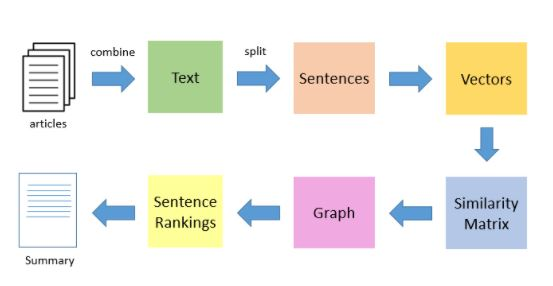

In [ ]:
from IPython.display import Image
Image('textrank.JPG')



*   The first step would be to concatenate all the text contained in the articles
*   Then split the text into individual sentences


* In the next step, we will find vector representation (word embeddings) for each and every sentence

*   Similarities between sentence vectors are then calculated and stored in a matrix



*   The similarity matrix is then converted into a graph, with sentences as vertices and similarity scores as edges, for sentence rank calculation
*   Finally, a certain number of top-ranked sentences form the final summary







In [ ]:
#from nltk.corpus import stopwords as stop_words
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx

### Generate clean sentences

In [ ]:
import re 
text = text.replace("Ms.", "Ms")
#delete everything between brackets
text = re.sub("[\(\[].*?[\)\]]", "", text)

In [ ]:
def read_article(text):
    article = text.split(". ")
    sentences = []

    for sentence in article:
        #print(sentence)
        sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
    sentences.pop() 
    
    return sentences

In [ ]:
sentences = read_article(text)

### Calculate sentence Similarity

In [ ]:
def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
 
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]

    # set to get unique words
    all_words = list(set(sent1 + sent2))
 
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1
 
    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
    #cosine distance = 1 -cosine similarity
    return 1 - cosine_distance(vector1, vector2)
# cosine similarity = cos(theta) cos(90) = 0, cos(0) = 1, it ranges between -1 AND 1.

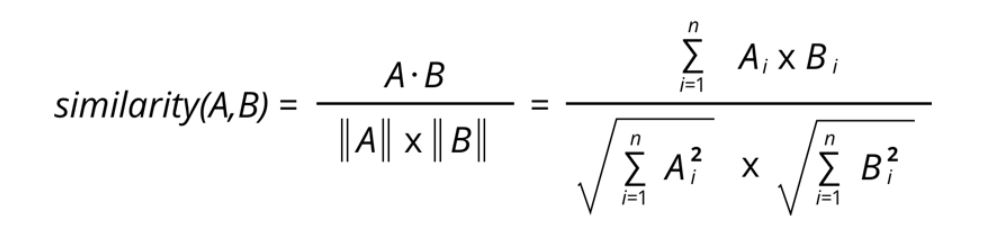

In [ ]:
# Formula for cosine similarity
Image('Capture.JPG')

In [ ]:
sent1 = 'Lists and tuples are standard Python data types that store values in a sequence. '
sent2 = ' Sets are another standard Python data type that also store values. '
sentence_similarity(sent1,sent2,STOP_WORDS)

0.974792988617498

In [ ]:
set1 =[w.lower() for w in sent1]
set1 = list(set(set1))
set1.index('s')

5

Similarity matrix
This is where we will be using cosine similarity to find similarity between sentences.

In [ ]:
def build_similarity_matrix(sentences, stop_words):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
 
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2: #ignore if both are same sentences
                continue 
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)
    return similarity_matrix

In [ ]:
sentence_similarity_martix = build_similarity_matrix(sentences, STOP_WORDS)

In [ ]:
sentence_similarity_martix

array([[0.        , 0.03086067, 0.24053512, 0.09968896, 0.        ,
        0.        , 0.08451543, 0.        , 0.14414999, 0.        ,
        0.10350983, 0.06172134, 0.03733267, 0.08964215, 0.        ,
        0.        , 0.        , 0.        , 0.14638501, 0.03314968,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.0174342 , 0.        , 0.        ],
       [0.03086067, 0.        , 0.        , 0.05383819, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.19364917, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.24053512, 0.        , 0.        , 0.18650096, 0.04564355,
        0.        , 0.23717082, 0.        , 0.        , 0.2236068 ,
        0.06454972, 0.05773503, 0.06984303, 0.0559017 , 0.        ,
        0.        , 0.    

### Applying PageRank Algorithm
Rank sentences in similarity martix

In [ ]:
sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
scores = nx.pagerank(sentence_similarity_graph)

Sort the rank and pick top sentences

In [ ]:
ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
print("Indexes of top ranked_sentence order are ", ranked_sentence)    
summarize_text = []
for i in range(3):
    summarize_text.append(" ".join(ranked_sentence[i][1]))

Indexes of top ranked_sentence order are  [(0.06600728632229283, ['We', 'have', 'a', 'record', 'number', 'of', 'Republican', 'women', 'in', 'Congress', 'and', 'I’m', 'especially', 'proud', 'to', 'be', 'one', 'of', 'them']), (0.05863498073894696, ['You', 'know,', 'I’m', 'not', 'going', 'to', 'stop', 'and', 'say,', '“Did', 'you', 'vote', 'for', 'me?”', 'I’m', 'going', 'to', 'work', 'to', 'find', 'common', 'ground.\n\nWe', 'need', 'to', 'agree', 'to', 'get', 'additional', 'support', 'for', 'our', 'families,', 'additional', 'P.P.P']), (0.0566142222483702, ['So', 'we', 'focused', 'on', 'getting', 'our', 'message', 'to', 'voters,', 'to', 'constituents:', 'It’s', 'about', 'fixing', 'the', 'gridlock', 'and', 'not', 'being', 'part', 'of', 'the', 'status', 'quo,', 'which', 'people', 'are', 'sick', 'and', 'tired', 'of.\n\nThey', 'were', 'looking', 'for', 'someone', 'who', 'can', 'work', 'in', 'a', 'bipartisan', 'manner,', 'and', 'I’m', 'focused', 'on', 'moving', 'forward,', 'healing', 'the', 'div

output

In [ ]:
print("Summarize Text: \n", ". ".join(summarize_text))

Summarize Text: 
 We have a record number of Republican women in Congress and I’m especially proud to be one of them. You know, I’m not going to stop and say, “Did you vote for me?” I’m going to work to find common ground.

We need to agree to get additional support for our families, additional P.P.P. So we focused on getting our message to voters, to constituents: It’s about fixing the gridlock and not being part of the status quo, which people are sick and tired of.

They were looking for someone who can work in a bipartisan manner, and I’m focused on moving forward, healing the divide and reaching out to all community groups


## 3 

## Sumy package

 Implemented summarization methods:

Luhn - heurestic method, 

Edmundson heurestic method with previous statistic research, 

Latent Semantic Analysis, LSA - one of the algorithm from http://scholar.google.com/citations?user=0fTuW_YAAAAJ&hl=en 

LexRank - Unsupervised approach inspired by algorithms PageRank and HITS, 

TextRank - Unsupervised approach, also using PageRank algorithm, 

SumBasic - Method that is often used as a baseline in the literature. 

KL-Sum - Method that greedily adds sentences to a summary so long as it decreases the KL Divergence. 

Reduction - Graph-based summarization, where a sentence salience is computed as the sum of the weights of its edges to other sentences. The weight of an edge between two sentences is computed in the same manner as TextRank.

In [ ]:
!pip install sumy

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from __future__ import absolute_import
from __future__ import division, print_function, unicode_literals

from sumy.parsers.html import HtmlParser
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer as Summarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words


LANGUAGE = "english"
SENTENCES_COUNT = 3


if __name__ == "__main__":
    
    parser = PlaintextParser.from_string(text, Tokenizer(LANGUAGE))
    stemmer = Stemmer(LANGUAGE)

    summarizer = Summarizer(stemmer)
    summarizer.stop_words = get_stop_words(LANGUAGE)

    for sentence in summarizer(parser.document, SENTENCES_COUNT):
        print(sentence)

The Democratic victories, particularly in Orange County, were taken as evidence of the state’s firm rejection of the president when he wasn’t on the ballot.
So we focused on getting our message to voters, to constituents: It’s about fixing the gridlock and not being part of the status quo, which people are sick and tired of.
They were looking for someone who can work in a bipartisan manner, and I’m focused on moving forward, healing the divide and reaching out to all community groups.


## 4
##Pysummarization

 And this library applies accel-brain-base to implement Encoder/Decoder based on LSTM improving the accuracy of summarization by Sequence-to-Sequence(Seq2Seq) learning.

In [ ]:
!pip install pysummarization

In [ ]:
from pysummarization.nlpbase.auto_abstractor import AutoAbstractor
from pysummarization.tokenizabledoc.simple_tokenizer import SimpleTokenizer
from pysummarization.abstractabledoc.top_n_rank_abstractor import TopNRankAbstractor

In [ ]:
# Object of automatic summarization.
auto_abstractor = AutoAbstractor()
# Set tokenizer.
auto_abstractor.tokenizable_doc = SimpleTokenizer()
# Set delimiter for making a list of sentence.
auto_abstractor.delimiter_list = [".", "\n"]
# Object of abstracting and filtering document.
abstractable_doc = TopNRankAbstractor()
# Summarize document.
result_dict = auto_abstractor.summarize(text, abstractable_doc)

# Output result.
for sentence in result_dict["summarize_result"]:
    print(sentence)

Almost exactly a month ago — and a full 10 days after Election Day — Young Kim became the official winner of a close, hard-fought race to represent California’s 39th Congressional District.

The race was a rematch between Ms Kim, a Republican former state lawmaker, and Representative Gil Cisneros, who narrowly clinched the Northern Orange County-area seat as part of the 2018 “blue wave,” in which Democrats were ushered into seats that had previously been solidly in Republican hands.

The Democratic victories, particularly in Orange County, were taken as evidence of the state’s firm rejection of the president when he wasn’t on the ballot.

 So the rematches in 2020 were closely watched tests of the durability of leftward shifts.

The results? Well, the president lost in California by a huge margin.

 But Ms Kim was among the four Republicans  to narrowly recapture those seats.

 Last week, I spoke with Ms Kim about that historic distinction, the pandemic and the California Republican Pa

In [ ]:
result_dict['scoring_data']

[(1, 24.3),
 (2, 39.093023255813954),
 (3, 18.181818181818183),
 (4, 10.285714285714286),
 (5, 10.0),
 (6, 5.818181818181818),
 (8, 4.571428571428571),
 (22, 4.0),
 (45, 3.2),
 (47, 3.0)]

##5
##Gensim summarizer 

Returns a summarized version of the given text using a variation of the TextRank algorithm. The input must be longer than INPUT_MIN_LENGTH sentences for the summary to make sense and must be given as a string.

The output summary will consist of the most representative sentences and will also be returned as a string, divided by newlines. If the split parameter is set to True, a list of sentences will be returned.

The length of the output can be specified using the ratio and word_count parameters:

ratio should be a number between 0 and 1 that determines the
percentage of the number of sentences of the original text to be chosen for the summary (defaults at 0.2).

word_count determines how many words will the output contain.
If both parameters are provided, the ratio will be ignored.

In [ ]:
import nltk
import gensim


gensim_summary = gensim.summarization.summarize(text,word_count=70)
gensim_summary

'Now, Ms Kim, along with her fellow Orange County Republican Michelle Steel, will be among the first three Korean-American women in Congress.\nLast week, I spoke with Ms Kim about that historic distinction, the pandemic and the California Republican Party after Trump.\nHow are you thinking about the Republican Party specifically in California in the post-Trump era?'